GROUP DECSION MAKING

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Necessary Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

HUMAN GROUPS

In [16]:
# File path for Human Agents Correctness
file_path = '/content/drive/MyDrive/MastersProject/Humancorrectness.csv'

# Read the CSV file into a Pandas DataFrame
HumanAgents = pd.read_csv(file_path)
HumanAgents

,A1,A2,A3,A4,A5,A6,A7,A8
0,0.2,0.5,-0.2,-0.4,-0.3,-0.7,-0.8,0.1
1,-0.3,-0.3,-0.3,-0.5,-0.4,-0.7,-0.5,-0.1
2,0.6,-0.3,-0.2,-0.6,-0.5,-0.7,0.4,-0.2
3,-1.0,-1.0,-1.0,-0.6,-1.0,-1.0,-1.0,-0.9
4,-1.0,-1.0,-0.3,-0.5,-1.0,0.9,0.4,-0.2
...,...,...,...,...,...,...,...,...
283,0.3,-0.9,-0.8,-0.6,-0.2,-0.8,-0.5,-0.1
284,-1.0,0.8,-0.5,0.5,-1.0,-0.9,0.2,-0.2
285,-1.0,-0.5,-0.7,-0.6,-0.8,-0.9,0.1,-0.1
286,-1.0,-0.9,-1.0,-0.9,-1.0,-1.0,-0.6,-0.1


Individual Human agent Performance

In [3]:
# Count the negative values in each column
negative_counts = HumanAgents.lt(0).sum()

# Calculate the total number of trials
total_trials = len(HumanAgents)

# Calculate accuracy for each agent
accuracy = negative_counts / total_trials

print("Accuracy of each agent:")
print(accuracy)


Accuracy of each agent:
A1    0.670139
A2    0.715278
A3    0.760417
A4    0.760417
A5    0.923611
A6    0.871528
A7    0.763889
A8    0.527778
dtype: float64


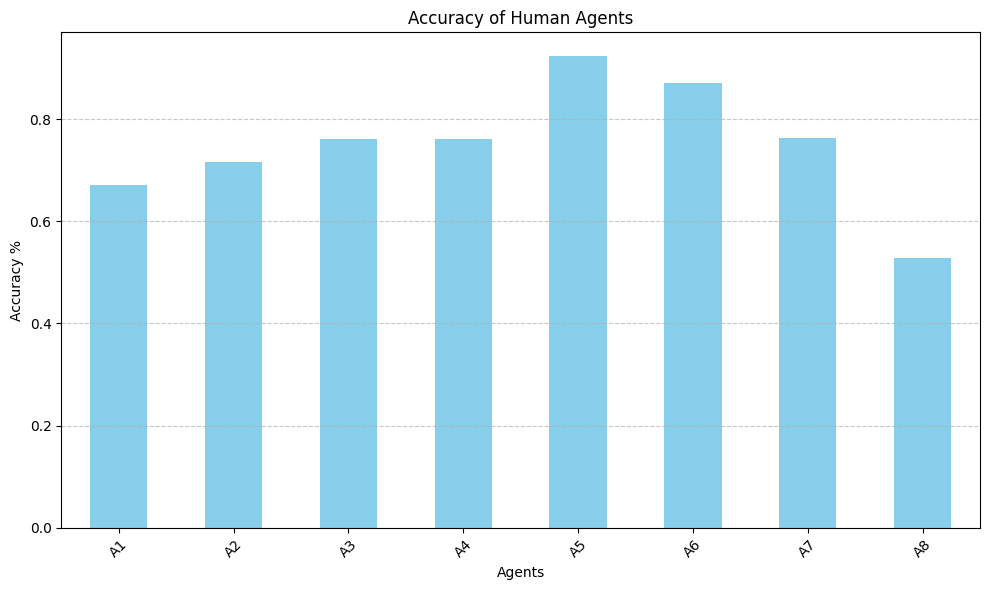

In [4]:
# Bar Chart of Human Agents by Accuracy
plt.figure(figsize=(10, 6))
accuracy.plot(kind='bar', color='skyblue')
plt.title('Accuracy of Human Agents')
plt.xlabel('Agents')
plt.ylabel('Accuracy %')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


AVERAGE HUMAN ACCURACY

In [5]:
# Calculate the average human accuracy
average_accuracy = accuracy.mean()

print("Average Accuracy:", average_accuracy)


Average Accuracy: 0.7491319444444444


HUMAN ONLY GROUPS

In [6]:
# Create dictionary to store average accuracy for each group size
average_accuracy_dict = {}

# Iterate over all possible group sizes from 2 to 8
for group_size in range(1, 9):
    # Create a list to store the accuracy of each group combination for the current group size
    accuracy_list = []

    # Generate all possible combinations of agents for the current group size
    agent_combinations = combinations(HumanAgents.columns, group_size)

    # Iterate over each combination
    for agents in agent_combinations:
        # Calculate the sum of weighted correctness for each trial in the group
        group_sum = HumanAgents[list(agents)].sum(axis=1)

        # Determine correct or incorrect decision based on the sum
        decisions = [-1 if val < 0 else 1 for val in group_sum]

        # Calculate accuracy
        correct_decisions = decisions.count(-1)
        total_trials = len(decisions)
        accuracy = correct_decisions / total_trials

        # Append accuracy to the accuracy list
        accuracy_list.append(accuracy)

    # Calculate the average accuracy for the current group size
    average_accuracy = sum(accuracy_list) / len(accuracy_list)

    # Store the average accuracy in the dictionary
    average_accuracy_dict[f'Group Size {group_size}'] = average_accuracy

# Print average accuracy for each group size
for group_size, average_accuracy in average_accuracy_dict.items():
    print(f"{group_size}: Average Accuracy = {average_accuracy:.4f}")


Group Size 1: Average Accuracy = 0.7491
Group Size 2: Average Accuracy = 0.7927
Group Size 3: Average Accuracy = 0.8224
Group Size 4: Average Accuracy = 0.8364
Group Size 5: Average Accuracy = 0.8470
Group Size 6: Average Accuracy = 0.8545
Group Size 7: Average Accuracy = 0.8602
Group Size 8: Average Accuracy = 0.8576


IMPORT RESNET CORRECTNESS

In [7]:
import pandas as pd
# File path to ResNet Correctness
file_path = '/content/drive/MyDrive/MastersProject/resnet_weighted_correctness.csv'

# Read the CSV file into a Pandas DataFrame
AIAgents = pd.read_csv(file_path)
AIAgents

,A1,A2,A3,A4,A5,A6,A7,A8
0,-0.5,0.9,0.8,0.7,-0.6,0.9,0.4,0.8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,-1.0,1.0,0.9,-1.0,-1.0,-0.8,-0.9
3,-0.8,0.7,-0.5,-0.3,-0.9,0.7,-0.6,0.6
4,-0.6,0.8,0.2,0.1,-0.7,0.8,-0.4,0.5
...,...,...,...,...,...,...,...,...
283,-0.8,-1.0,-1.0,-0.8,-0.9,-1.0,-0.6,-0.9
284,0.6,-0.9,-0.6,-0.5,0.7,-0.9,0.4,-0.7
285,0.3,-0.9,-0.8,-0.6,0.4,-1.0,0.2,-0.8
286,1.0,-1.0,-1.0,-0.9,-1.0,-1.0,-0.9,-1.0


Create AI only Groups

In [8]:
# Create a dictionary to store average accuracy for each group size
average_accuracy_dict = {}

# Iterate over all possible group sizes from 2 to 8
for group_size in range(1, 9):
    # Create a list to store the accuracy of each group combination for the current group size
    accuracy_list = []

    # Generate all possible combinations of agents for the current group size
    agent_combinations = combinations(AIAgents.columns, group_size)

    # Iterate over each combination
    for agents in agent_combinations:
        # Calculate the sum of weighted correctness for each trial in the group
        group_sum = AIAgents[list(agents)].sum(axis=1)

        # Determine correct or incorrect decision based on the sum
        decisions = [-1 if val < 0 else 1 for val in group_sum]

        # Calculate accuracy
        correct_decisions = decisions.count(-1)
        total_trials = len(decisions)
        accuracy = correct_decisions / total_trials

        # Append accuracy to the accuracy list
        accuracy_list.append(accuracy)

    # Calculate the average accuracy for the current group size
    average_accuracy = sum(accuracy_list) / len(accuracy_list)

    # Store the average accuracy in the dictionary
    average_accuracy_dict[f'Group Size {group_size}'] = average_accuracy

# Print average accuracy for each group size
for group_size, average_accuracy in average_accuracy_dict.items():
    print(f"{group_size}: Average Accuracy = {average_accuracy:.4f}")


Group Size 1: Average Accuracy = 0.7465
Group Size 2: Average Accuracy = 0.7603
Group Size 3: Average Accuracy = 0.7887
Group Size 4: Average Accuracy = 0.7875
Group Size 5: Average Accuracy = 0.7914
Group Size 6: Average Accuracy = 0.7944
Group Size 7: Average Accuracy = 0.7943
Group Size 8: Average Accuracy = 0.7986


Find Best AI AGENTS

In [9]:
import pandas as pd

# Assuming df is your DataFrame containing the weighted correctness values
# Let's say it's already loaded as 'df'

# Create a dictionary to store the accuracy of each agent
agent_accuracy = {}

# Iterate over each agent
for agent in AIAgents.columns:
    # Determine correct or incorrect decision based on the agent's value
    decisions = [-1 if val < 0 else 1 for val in AIAgents[agent]]

    # Calculate accuracy
    correct_decisions = decisions.count(-1)
    total_trials = len(decisions)
    accuracy = correct_decisions / total_trials

    # Store the accuracy for the agent
    agent_accuracy[agent] = accuracy

# Print accuracy for each agent
for agent, accuracy in agent_accuracy.items():
    print(f"Agent {agent}: Accuracy = {accuracy:.4f}")


Agent A1: Accuracy = 0.7118
Agent A2: Accuracy = 0.7535
Agent A3: Accuracy = 0.8090
Agent A4: Accuracy = 0.8056
Agent A5: Accuracy = 0.7083
Agent A6: Accuracy = 0.7396
Agent A7: Accuracy = 0.7049
Agent A8: Accuracy = 0.7396


Best AI Models are High Confidence Unbiased and Low Confidence Unbiased

We combine the best 2 AI models with the 8 human agents

In [10]:
# File path in Google Drive
file_path = '/content/drive/MyDrive/MastersProject/Human_AI_weightedcorrectness.csv'

# Read the CSV file into a Pandas DataFrame
HumanAIAgents = pd.read_csv(file_path)
HumanAIAgents

,Agent 1,Agent 2,Agent 3,Agent 4,Agent 5,Agent 6,Agent 7,Agent 8,Agent 9,Agent 10
0,0.2,0.5,-0.2,-0.4,-0.3,-0.7,-0.8,0.1,0.8,0.7
1,-0.3,-0.3,-0.3,-0.5,-0.4,-0.7,-0.5,-0.1,0.0,0.0
2,0.6,-0.3,-0.2,-0.6,-0.5,-0.7,0.4,-0.2,1.0,0.9
3,-1.0,-1.0,-1.0,-0.6,-1.0,-1.0,-1.0,-0.9,-0.5,-0.3
4,-1.0,-1.0,-0.3,-0.5,-1.0,0.9,0.4,-0.2,0.2,0.1
...,...,...,...,...,...,...,...,...,...,...
283,0.3,-0.9,-0.8,-0.6,-0.2,-0.8,-0.5,-0.1,-1.0,-0.8
284,-1.0,0.8,-0.5,0.5,-1.0,-0.9,0.2,-0.2,-0.6,-0.5
285,-1.0,-0.5,-0.7,-0.6,-0.8,-0.9,0.1,-0.1,-0.8,-0.6
286,-1.0,-0.9,-1.0,-0.9,-1.0,-1.0,-0.6,-0.1,-1.0,-0.9


CREATE ALL POSSIBLE COMBINATIONS OF 8 HUMAN AGENTS AND TWO RESNET MODELS FOR GROUP SIZES 1 - 8

In [11]:
# Create a dictionary to store average accuracy for each group size
average_accuracy_dict = {}

# Iterate over all possible group sizes from 1 to 8
for group_size in range(1, 9):
    # Create a list to store the accuracy of each group combination for the current group size
    accuracy_list = []

    # Generate all possible combinations of agents for the current group size
    agent_combinations = combinations(HumanAIAgents.columns, group_size)

    # Iterate over each combination
    for agents in agent_combinations:
        # Calculate the sum of weighted correctness for each trial in the group
        group_sum = HumanAIAgents[list(agents)].sum(axis=1)

        # Determine correct or incorrect decision based on the sum
        decisions = [-1 if val < 0 else 1 for val in group_sum]

        # Calculate accuracy
        correct_decisions = decisions.count(-1)
        total_trials = len(decisions)
        accuracy = correct_decisions / total_trials

        # Append accuracy to the accuracy list
        accuracy_list.append(accuracy)

    # Calculate the average accuracy for the current group size
    average_accuracy = sum(accuracy_list) / len(accuracy_list)

    # Store the average accuracy in the dictionary
    average_accuracy_dict[f'Group Size {group_size}'] = average_accuracy

# Print average accuracy for each group size
for group_size, average_accuracy in average_accuracy_dict.items():
    print(f"{group_size}: Average Accuracy = {average_accuracy:.4f}")


Group Size 1: Average Accuracy = 0.7608
Group Size 2: Average Accuracy = 0.7992
Group Size 3: Average Accuracy = 0.8348
Group Size 4: Average Accuracy = 0.8495
Group Size 5: Average Accuracy = 0.8599
Group Size 6: Average Accuracy = 0.8689
Group Size 7: Average Accuracy = 0.8761
Group Size 8: Average Accuracy = 0.8809


Line Plot Showing Changes in accuracy by Group Sizes for AI agents, Human Agents and HumanAI Agents

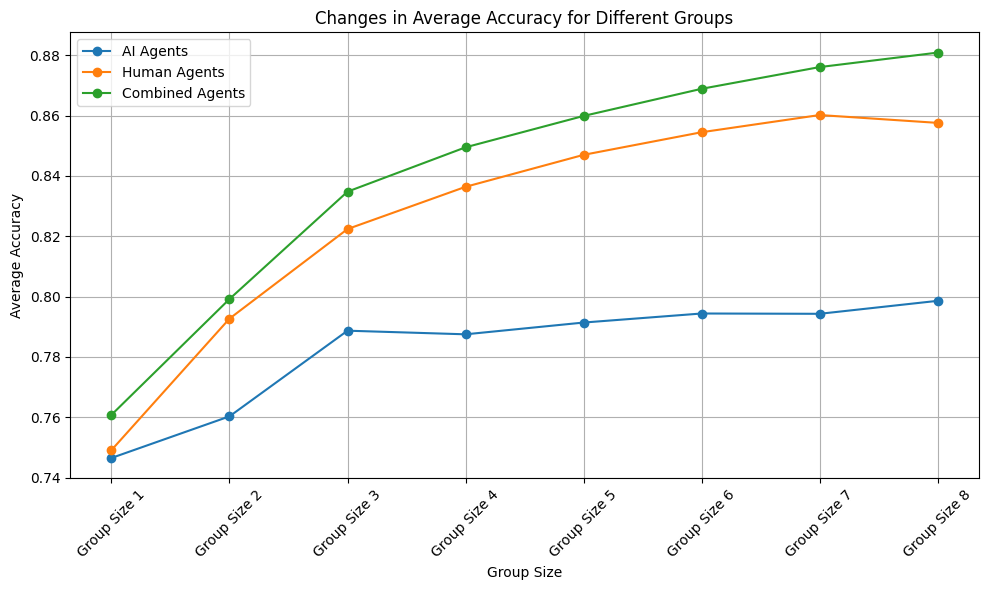

In [12]:
# Data for AI Agents
ai_agents_data = {
    'Group Size 1': 0.7465,
    'Group Size 2': 0.7603,
    'Group Size 3': 0.7887,
    'Group Size 4': 0.7875,
    'Group Size 5': 0.7914,
    'Group Size 6': 0.7944,
    'Group Size 7': 0.7943,
    'Group Size 8': 0.7986
}

# Data for Human Agents
human_agents_data = {
    'Group Size 1': 0.7491,
    'Group Size 2': 0.7927,
    'Group Size 3': 0.8224,
    'Group Size 4': 0.8364,
    'Group Size 5': 0.8470,
    'Group Size 6': 0.8545,
    'Group Size 7': 0.8602,
    'Group Size 8': 0.8576
}

# Data for Combined Agents
combined_agents_data = {
    'Group Size 1': 0.7608,
    'Group Size 2': 0.7992,
    'Group Size 3': 0.8348,
    'Group Size 4': 0.8495,
    'Group Size 5': 0.8599,
    'Group Size 6': 0.8689,
    'Group Size 7': 0.8761,
    'Group Size 8': 0.8809
}

# Plotting
plt.figure(figsize=(10, 6))

# AI Agents
plt.plot(list(ai_agents_data.keys()), list(ai_agents_data.values()), label='AI Agents', marker='o')

# Human Agents
plt.plot(list(human_agents_data.keys()), list(human_agents_data.values()), label='Human Agents', marker='o')

# Combined Agents
plt.plot(list(combined_agents_data.keys()), list(combined_agents_data.values()), label='Combined Agents', marker='o')

# Adding labels and title
plt.xlabel('Group Size')
plt.ylabel('Average Accuracy')
plt.title('Changes in Average Accuracy for Different Groups')
plt.legend()

# Display plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


COMBINING 4 AI MODELS WITH 8 HUMAN AGENTS

LOAD THE WEIGHTED CORRECTNESS OF HUMANS-AI Agents

In [13]:
# File path in Google Drive
file_path = '/content/drive/MyDrive/MastersProject/8humans4AI.csv'

# Read the CSV file into a Pandas DataFrame
HumanAIAgents = pd.read_csv(file_path)
HumanAIAgents

,Agent 1,Agent 2,Agent 3,Agent 4,Agent 5,Agent 6,Agent 7,Agent 8,Agent 9,Agent 10,Agent 11,Agent 12
0,0.2,0.5,-0.2,-0.4,-0.3,-0.7,-0.8,0.1,0.8,0.7,-0.5,0.9
1,-0.3,-0.3,-0.3,-0.5,-0.4,-0.7,-0.5,-0.1,0.0,0.0,0.0,0.0
2,0.6,-0.3,-0.2,-0.6,-0.5,-0.7,0.4,-0.2,1.0,0.9,-1.0,-1.0
3,-1.0,-1.0,-1.0,-0.6,-1.0,-1.0,-1.0,-0.9,-0.5,-0.3,-0.8,0.7
4,-1.0,-1.0,-0.3,-0.5,-1.0,0.9,0.4,-0.2,0.2,0.1,-0.6,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.3,-0.9,-0.8,-0.6,-0.2,-0.8,-0.5,-0.1,-1.0,-0.8,-0.8,-1.0
284,-1.0,0.8,-0.5,0.5,-1.0,-0.9,0.2,-0.2,-0.6,-0.5,0.6,-0.9
285,-1.0,-0.5,-0.7,-0.6,-0.8,-0.9,0.1,-0.1,-0.8,-0.6,0.3,-0.9
286,-1.0,-0.9,-1.0,-0.9,-1.0,-1.0,-0.6,-0.1,-1.0,-0.9,1.0,-1.0


CREATE ALL POSSIBLE COMBINATIONS OF 8 HUMAN AGENTS AND 4 RESNET MODELS FOR GROUP SIZES 1 - 10

In [14]:
# Create a dictionary to store average accuracy for each group size
average_accuracy_dict = {}

# Iterate over all possible group sizes from 2 to 8
for group_size in range(1, 11):
    # Create a list to store the accuracy of each group combination for the current group size
    accuracy_list = []

    # Generate all possible combinations of agents for the current group size
    agent_combinations = combinations(HumanAIAgents.columns, group_size)

    # Iterate over each combination
    for agents in agent_combinations:
        # Calculate the sum of weighted correctness for each trial in the group
        group_sum = HumanAIAgents[list(agents)].sum(axis=1)

        # Determine correct or incorrect decision based on the sum
        decisions = [-1 if val < 0 else 1 for val in group_sum]

        # Calculate accuracy
        correct_decisions = decisions.count(-1)
        total_trials = len(decisions)
        accuracy = correct_decisions / total_trials

        # Append accuracy to the accuracy list
        accuracy_list.append(accuracy)

    # Calculate the average accuracy for the current group size
    average_accuracy = sum(accuracy_list) / len(accuracy_list)

    # Store the average accuracy in the dictionary
    average_accuracy_dict[f'Group Size {group_size}'] = average_accuracy

# Print average accuracy for each group size
for group_size, average_accuracy in average_accuracy_dict.items():
    print(f"{group_size}: Average Accuracy = {average_accuracy:.4f}")


Group Size 1: Average Accuracy = 0.7561
Group Size 2: Average Accuracy = 0.7946
Group Size 3: Average Accuracy = 0.8355
Group Size 4: Average Accuracy = 0.8497
Group Size 5: Average Accuracy = 0.8611
Group Size 6: Average Accuracy = 0.8699
Group Size 7: Average Accuracy = 0.8757
Group Size 8: Average Accuracy = 0.8827
Group Size 9: Average Accuracy = 0.8859
Group Size 10: Average Accuracy = 0.8901


Line Plot Showing Changes in accuracy by Group Sizes for AI agents, Human Agents and HumanAI-Agents(8 Humans + 4 AI Agents)

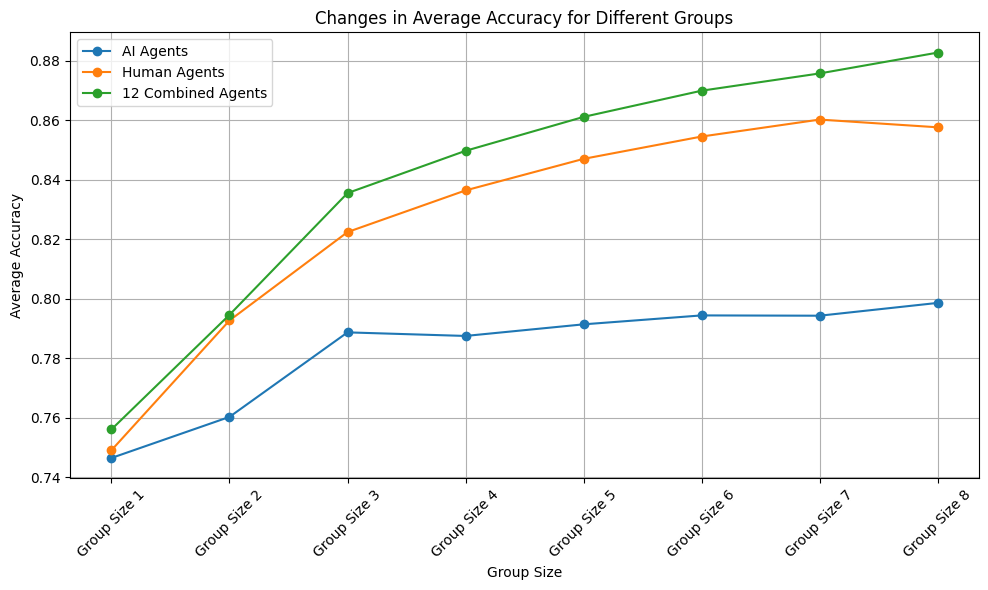

In [15]:
# Data for AI Agents
ai_agents_data = {
    'Group Size 1': 0.7465,
    'Group Size 2': 0.7603,
    'Group Size 3': 0.7887,
    'Group Size 4': 0.7875,
    'Group Size 5': 0.7914,
    'Group Size 6': 0.7944,
    'Group Size 7': 0.7943,
    'Group Size 8': 0.7986
}

# Data for Human Agents
human_agents_data = {
    'Group Size 1': 0.7491,
    'Group Size 2': 0.7927,
    'Group Size 3': 0.8224,
    'Group Size 4': 0.8364,
    'Group Size 5': 0.8470,
    'Group Size 6': 0.8545,
    'Group Size 7': 0.8602,
    'Group Size 8': 0.8576
}

# Data for Combined Agents
combined_agents_data = {
    'Group Size 1': 0.7561,
    'Group Size 2': 0.7946,
    'Group Size 3': 0.8355,
    'Group Size 4': 0.8497,
    'Group Size 5': 0.8611,
    'Group Size 6': 0.8699,
    'Group Size 7': 0.8757,
    'Group Size 8': 0.8827
}

# Plotting
plt.figure(figsize=(10, 6))

# AI Agents
plt.plot(list(ai_agents_data.keys()), list(ai_agents_data.values()), label='AI Agents', marker='o')

# Human Agents
plt.plot(list(human_agents_data.keys()), list(human_agents_data.values()), label='Human Agents', marker='o')

# Combined Agents
plt.plot(list(combined_agents_data.keys()), list(combined_agents_data.values()), label='12 Combined Agents', marker='o')

# Adding labels and title
plt.xlabel('Group Size')
plt.ylabel('Average Accuracy')
plt.title('Changes in Average Accuracy for Different Groups')
plt.legend()

# Display plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
